In [1]:
import os
os.environ["OMP_NUM_THREADS"]="1"
os.nice(19)

19

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl
from astropy.io import fits
import pandas as pd
import sys
import scipy
from scipy import stats
from astropy.visualization import ZScaleInterval
from uncertainties import ufloat 
from glob import glob
import csv
from scipy import constants
from astropy import units as u
from astropy import constants as ascon
import time as tm
import datetime
import re

from PyAstronomy.pyTiming import pyPeriod
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from glob import glob

In [3]:
import lightkurve as lk

In [4]:
target ='K2-25'
#search_result = lk.search_lightcurve(target, author='QLP')
search_result = lk.search_lightcurve(target)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 04,2015,K2,1800,ktwo210490365,0.0
1,K2 Campaign 04,2015,EVEREST,1800,ktwo210490365,0.0
2,K2 Campaign 04,2015,K2SC,1800,ktwo210490365,0.0
3,K2 Campaign 04,2015,K2SFF,1800,ktwo210490365,0.0
4,K2 Campaign 04,2015,K2VARCAT,1800,ktwo210490365,0.0
5,TESS Sector 44,2021,SPOC,120,434226736,0.0
...,...,...,...,...,...,...
11,TESS Sector 70,2023,TESS-SPOC,200,434226736,0.0
12,TESS Sector 70,2023,QLP,200,434226736,0.0


In [5]:
from astroquery.ipac.nexsci.nasa_exoplanet_archive import NasaExoplanetArchive

In [6]:
target_table = NasaExoplanetArchive.query_object(target, table='ps')
target_table

UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]
UnitTypeError("MaskedQuantity instances require normal units, not <class 'astropy.units.function.logarithmic.DexUnit'> instances.") [astropy.table.table]


pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,disc_pubdate,disc_year,discoverymethod,disc_locale,disc_facility,disc_instrument,disc_telescope,disc_refname,ra,rastr,dec,decstr,glon,glat,elon,elat,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbperstr,pl_orblpererr1,pl_orblper,pl_orblpererr2,pl_orblperlim,pl_orblperstr,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmaxstr,pl_orbincl,pl_orbinclerr1,pl_orbinclerr2,pl_orbincllim,pl_orbinclstr,pl_orbtper,pl_orbtpererr1,pl_orbtpererr2,pl_orbtperlim,pl_orbtperstr,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_orbeccenstr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtstr,pl_occdep,pl_occdeperr1,pl_occdeperr2,pl_occdeplim,pl_occdepstr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolstr,pl_dens,pl_denserr1,pl_denserr2,pl_denslim,pl_densstr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepstr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidstr,pl_trandur,pl_trandurerr1,pl_trandurerr2,pl_trandurlim,pl_trandurstr,sy_kmagstr,sy_umag,sy_umagerr1,sy_umagerr2,sy_umagstr,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmagstr,sy_imag,sy_imagerr1,sy_imagerr2,sy_imagstr,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmagstr,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1magstr,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2magstr,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3magstr,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4magstr,sy_gmag,sy_gmagerr1,sy_gmagerr2,sy_gmagstr,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamagstr,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmagstr,pl_controv_flag,pl_tsystemref,st_metratio,st_spectype,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmagstr,st_rotp,st_rotperr1,st_rotperr2,st_rotplim,st_rotpstr,pl_projobliq,pl_projobliqerr1,pl_projobliqerr2,pl_projobliqlim,pl_projobliqstr,x,y,z,htm20,pl_rvamp,pl_rvamperr1,pl_rvamperr2,pl_rvamplim,pl_rvampstr,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_radjstr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radestr,pl_ratror,pl_ratrorerr1,pl_ratrorerr2,pl_ratrorlim,pl_ratrorstr,pl_ratdor,pl_trueobliq,pl_trueobliqerr1,pl_trueobliqerr2,pl_trueobliqlim,pl_trueobliqstr,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_icmagstr,rowupdate,pl_pubdate,st_refname,releasedate,dkin_flag,pl_ratdorerr1,pl_ratdorerr2,pl_ratdorlim,pl_ratdorstr,pl_imppar,pl_impparerr1,pl_impparerr2,pl_impparlim,pl_impparstr,pl_cmassj,pl_cmassjerr1,pl_cmassjerr2,pl_cmassjlim,pl_cmassjstr,pl_cmasse,pl_cmasseerr1,pl_cmasseerr2,pl_cmasselim,pl_cmassestr,pl_massj,pl_massjerr1,pl_massjerr2,pl_massjlim,pl_massjstr,pl_masse,pl_masseerr1,pl_masseerr2,pl_masselim,pl_massestr,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassjstr,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassestr,pl_bmassprov,pl_msinij,pl_msinijerr1,pl_msinijerr2,pl_msinijlim,pl_msinijstr,pl_msinie,pl_msinieerr1,pl_msinieerr2,pl_msinielim,pl_msiniestr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffstr,st_met,st_meterr1,st_meterr2,st_metlim,st_metstr,st_radv,st_radverr1,st_radverr2,st_radvlim,st_radvstr,st_vsin,st_vsinerr1,st_vsinerr2,st_vsinlim,st_vsinstr,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_lumstr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggstr,st_age,st_ageerr1,st_ageerr2,st_agelim,st_agestr,st_mass,st_masserr1,st_masserr2,st_masslim,st_massstr,st_dens,st_denserr1,st_denserr2,st_denslim,st_densstr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radstr,ttv_flag,ptv_flag,tran_flag,rv_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,pul_flag,soltype,sy_snum,sy_pnum,sy_mnum,cb_flag,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec,pl_nnotes,sy_pm,sy_pmerr1,sy_pmerr2,sy_pmstr,sy_pmra,sy_pmraerr1,sy_pmraerr2,sy_pmrastr,sy_pmdec,sy_pmdecerr1,sy_pmdecerr2,sy_pmdecstr,sy_plx,sy_plxerr1,sy_plxerr2,sy_plxstr,sy_dist,sy_disterr1,sy_disterr2,sy_diststr,sy_bmag,sy_bmagerr1,sy_bmagerr2,sy_bmagstr,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_vmagstr,sy_jmag,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_h

In [7]:
ttable = target_table[0]

In [8]:
tic_id = ttable['tic_id']

In [9]:
offset= 2457000

T0 = float(ttable['pl_tranmid'].value)-offset #day
P =  float(ttable['pl_orbper'].value) #day

print(T0, P)

62.5793499997817 3.484552


In [10]:
n=5
lc = search_result[5].download()
#lc = lc.remove_nans().remove_outliers()

lc.time.value

array([2500.19232592, 2500.19371491, 2500.1951039 , ..., 2524.44218822,
       2524.44357715, 2524.44496608])

In [11]:
t_start= int(np.ceil((lc.time.value[0]-T0)/P))
t_end = int(np.ceil((lc.time.value[-1]-T0)/P))
ts = np.arange(t_start, t_end)
ts

array([700, 701, 702, 703, 704, 705, 706])

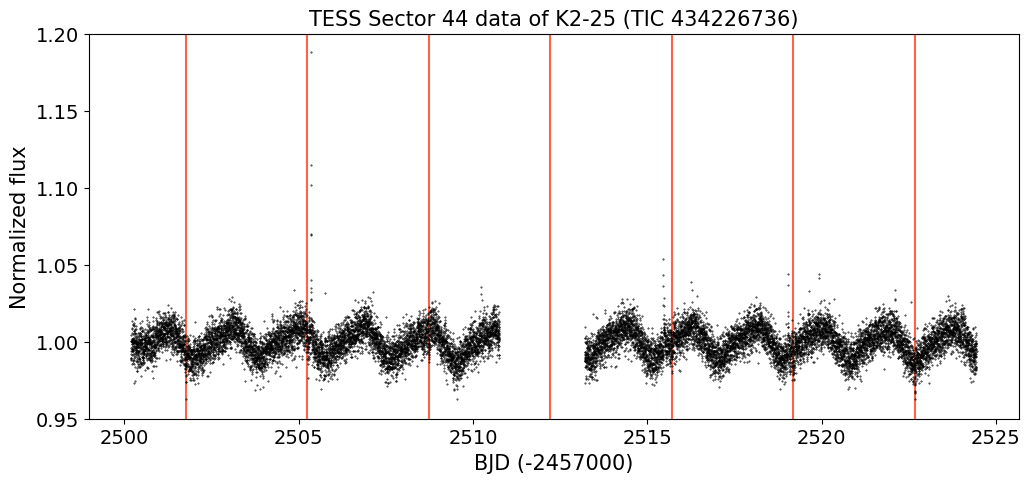

In [14]:
n=5
lc = search_result[5].download()
#lc = lc.remove_nans().remove_outliers()

f = pl.figure(figsize=(12, 5))

pl.plot(lc.time.value, lc.pdcsap_flux.value/np.median(lc.pdcsap_flux.value), '.', ms=0.8, color='k')

pl.vlines(ts*P+T0, 0.95, 1.20, color='tomato', zorder=-1)
 
pl.title(f'{search_result[n].mission[0]} data of {target} ({tic_id})', fontsize=15)

pl.xlabel(f'BJD (-{offset})', fontsize=15)
pl.ylabel('Normalized flux', fontsize=15)
pl.tick_params(axis='both', which='major', labelsize=14)


pl.ylim(0.95, 1.20)

f.savefig('LC_K2-25.png', bbox_inches='tight')
#pl.tight_layout()